In [1]:
#tratamiento de datos
import pandas as pd

#configuracion de visualizacion
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#exploracion de archivos
import sys
sys.path.append('../')

#funciones personalizadas
from SRC import sp_eda as se
from SRC import sp_limpieza as sl
from SRC import sp_nulos as sn
from SRC import sp_visualizaciones as sv

# GESTION DE NULOS

In [2]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

df = pd.read_csv('../datos/olist_limpios.csv', parse_dates=date_cols)
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

### Vista preliminar de nulos

In [3]:
df.isnull().mean()*100

order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.153932
order_delivered_carrier_date     1.754451
order_delivered_customer_date    2.933049
order_estimated_delivery_date    0.000000
price                            0.754822
freight_value                    0.754822
payment_type                     0.000927
payment_installments             0.000927
payment_value                    0.000927
review_score                     0.785423
review_creation_date             1.203635
customer_zip_code_prefix         0.000000
customer_state                   0.000000
product_name_length              2.178227
product_description_length       2.178227
product_photos_qty               2.178227
product_weight_g                 0.770586
seller_zip_code_prefix           0.754822
seller_state                     0.754822
product_category_name_english    2.199555
order_id                         0.000000
customer_id                      0

### Creacion de Data Frame de nulos

In [4]:
df_nulos = df.loc[:,df.isnull().sum()>0]
df_nulos.sample(5)

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,price,freight_value,payment_type,payment_installments,payment_value,review_score,review_creation_date,product_name_length,product_description_length,product_photos_qty,product_weight_g,seller_zip_code_prefix,seller_state,product_category_name_english,product_id,seller_id,review_id
985,2017-04-04 13:25:20,2017-04-05 10:00:47,2017-04-10 20:48:13,59.90,17.85,credit_card,3.0,77.75,5.0,2017-04-11,59.0,1726.0,5.0,123.0,94451.0,rs,health_beauty,fdd84aefb08c8f8225e0b8c97429d53b,94144541854e298c2d976cb893b81343,67bcf84d78cdf900585bd260e0aae88e
31672,2018-04-24 19:06:33,2018-04-26 14:43:00,2018-05-03 22:26:48,230.00,9.56,bank_slip,1.0,445.65,NaN,NaT,57.0,771.0,1.0,12000.0,3204.0,sp,construction_tools_lights,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,NaN
96351,2017-09-22 13:15:25,2017-09-25 19:24:57,2017-10-04 13:35:59,139.90,17.69,credit_card,2.0,315.18,5.0,2017-10-05,56.0,3335.0,1.0,3700.0,14580.0,sp,sports_leisure,c8d1837df49c5b4d91a388c81795156c,c3867b4666c7d76867627c2f7fb22e21,e8d6752ed73bd3fea64a8f9552632a58
81427,2018-08-21 07:30:13,2018-08-22 15:32:00,2018-08-29 22:25:44,24.99,13.52,credit_card,1.0,38.51,3.0,2018-08-30,44.0,1184.0,1.0,200.0,87120.0,pr,baby,86b7407656326df779576645e8e4531d,d8c7ba53e7e38711eaef8c2849d6d2e1,298428d10857cf2539a663d441964b0e
26500,2018-04-28 12:13:23,2018-04-30 13:59:00,2018-05-02 23:32:07,39.90,8.29,credit_card,2.0,48.19,5.0,2018-05-03,60.0,865.0,1.0,500.0,3562.0,sp,baby,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,3c033db44ba3a32a9f23a745dd931fcc


In [5]:
df_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107840 entries, 0 to 107839
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_approved_at              107674 non-null  datetime64[ns]
 1   order_delivered_carrier_date   105948 non-null  datetime64[ns]
 2   order_delivered_customer_date  104677 non-null  datetime64[ns]
 3   price                          107026 non-null  float64       
 4   freight_value                  107026 non-null  float64       
 5   payment_type                   107839 non-null  object        
 6   payment_installments           107839 non-null  float64       
 7   payment_value                  107839 non-null  float64       
 8   review_score                   106993 non-null  float64       
 9   review_creation_date           106542 non-null  datetime64[ns]
 10  product_name_length            105491 non-null  float64       
 11  

## Gestión de nulos de columnas categoricas

Comprobación de si alguna categoría sobresale sobre las otras

- payment_type tiene la categoría credit_card que sobresale con un 74.38%
- seller_state tiene la categoría sp que sobresale con un 70.57% 

In [6]:
sn.estadist_col_cat(df_nulos)

PAYMENT_TYPE
payment_type
credit_card    74.386128
bank_slip      19.099592
voucher         5.027819
debit_card      1.482752
not_defined     0.002782
Name: count, dtype: float64
------------------------
SELLER_STATE
seller_state
sp    70.577708
mg     7.917285
pr     7.637240
rj     4.234050
sc     3.617396
rs     1.949184
df     0.802114
ba     0.561016
go     0.469214
pe     0.395030
ma     0.372774
es     0.311573
mt     0.131677
ce     0.089021
rn     0.050074
ms     0.046365
pb     0.039874
ro     0.012982
pi     0.011128
se     0.008346
pa     0.007418
am     0.002782
ac     0.000927
Name: count, dtype: float64
------------------------
PRODUCT_CATEGORY_NAME_ENGLISH
product_category_name_english
bed_bath_table                             10.083457
health_beauty                               8.631306
sports_leisure                              7.558420
computers_accessories                       6.643175
furniture_decor                             6.643175
housewares              

## Visualización columnas categóricas

- Escluyo de la visualización las columnas ID ya que no tiene sentido incluirlas aqui y daría problema de carga de visualización.

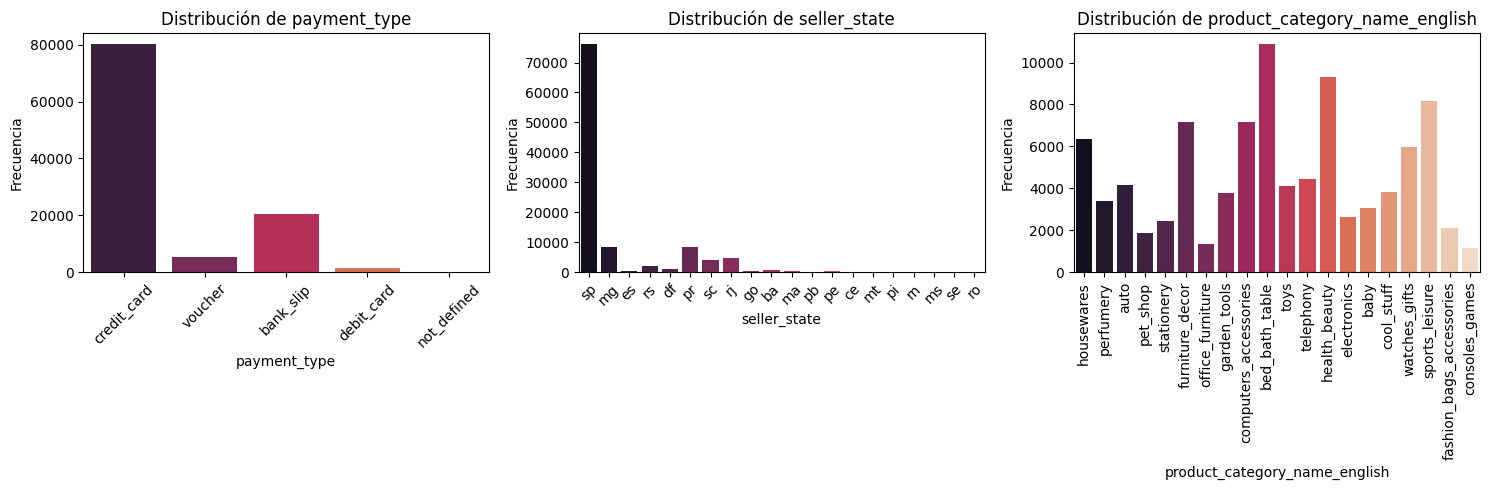

In [7]:
sv.subplot_col_cat(df_nulos)

- payment_type: tiene la categoría credit_card que sobresale con un 74.38% y el porcentaje de nulos es bajo  0.000927% asi que podermos imputar con la moda.
- payment_type: tiene la categoría not_defined con solo 3 entradas por lo que puede ser eliminada.
- seller_stare: tiene la categoría sp que sobresale con un 70.57% y el porcentahe de nulos es bajo 0.75% asi que podemos imputar con la moda.
- product_category_name_english: ninguna categoría destaca y tiene un número más importante de nulos 2.19% así que crearemos una nueva categoría   
  "unknown"

## Imputación de nulos en columnas categóricas

In [8]:
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df = df[df['payment_type'] != 'not_defined']
df['seller_state'].fillna(df['seller_state'].mode()[0], inplace=True)
df['product_category_name_english'].fillna('unknown', inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_29660\2224351399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_29660\2224351399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [9]:
df.isnull().mean()*100

order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.151154
order_delivered_carrier_date     1.751718
order_delivered_customer_date    2.930349
order_estimated_delivery_date    0.000000
price                            0.752061
freight_value                    0.752061
payment_type                     0.000000
payment_installments             0.000927
payment_value                    0.000927
review_score                     0.785445
review_creation_date             1.203668
customer_zip_code_prefix         0.000000
customer_state                   0.000000
product_name_length              2.175506
product_description_length       2.175506
product_photos_qty               2.175506
product_weight_g                 0.767826
seller_zip_code_prefix           0.752061
seller_state                     0.000000
product_category_name_english    0.000000
order_id                         0.000000
customer_id                      0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107837 entries, 0 to 107839
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_status                   107837 non-null  object        
 1   order_purchase_timestamp       107837 non-null  datetime64[ns]
 2   order_approved_at              107674 non-null  datetime64[ns]
 3   order_delivered_carrier_date   105948 non-null  datetime64[ns]
 4   order_delivered_customer_date  104677 non-null  datetime64[ns]
 5   order_estimated_delivery_date  107837 non-null  datetime64[ns]
 6   price                          107026 non-null  float64       
 7   freight_value                  107026 non-null  float64       
 8   payment_type                   107837 non-null  object        
 9   payment_installments           107836 non-null  float64       
 10  payment_value                  107836 non-null  float64       
 11  revie

## Gestión de nulos en columnas numéricas

### Visualización de Outliers

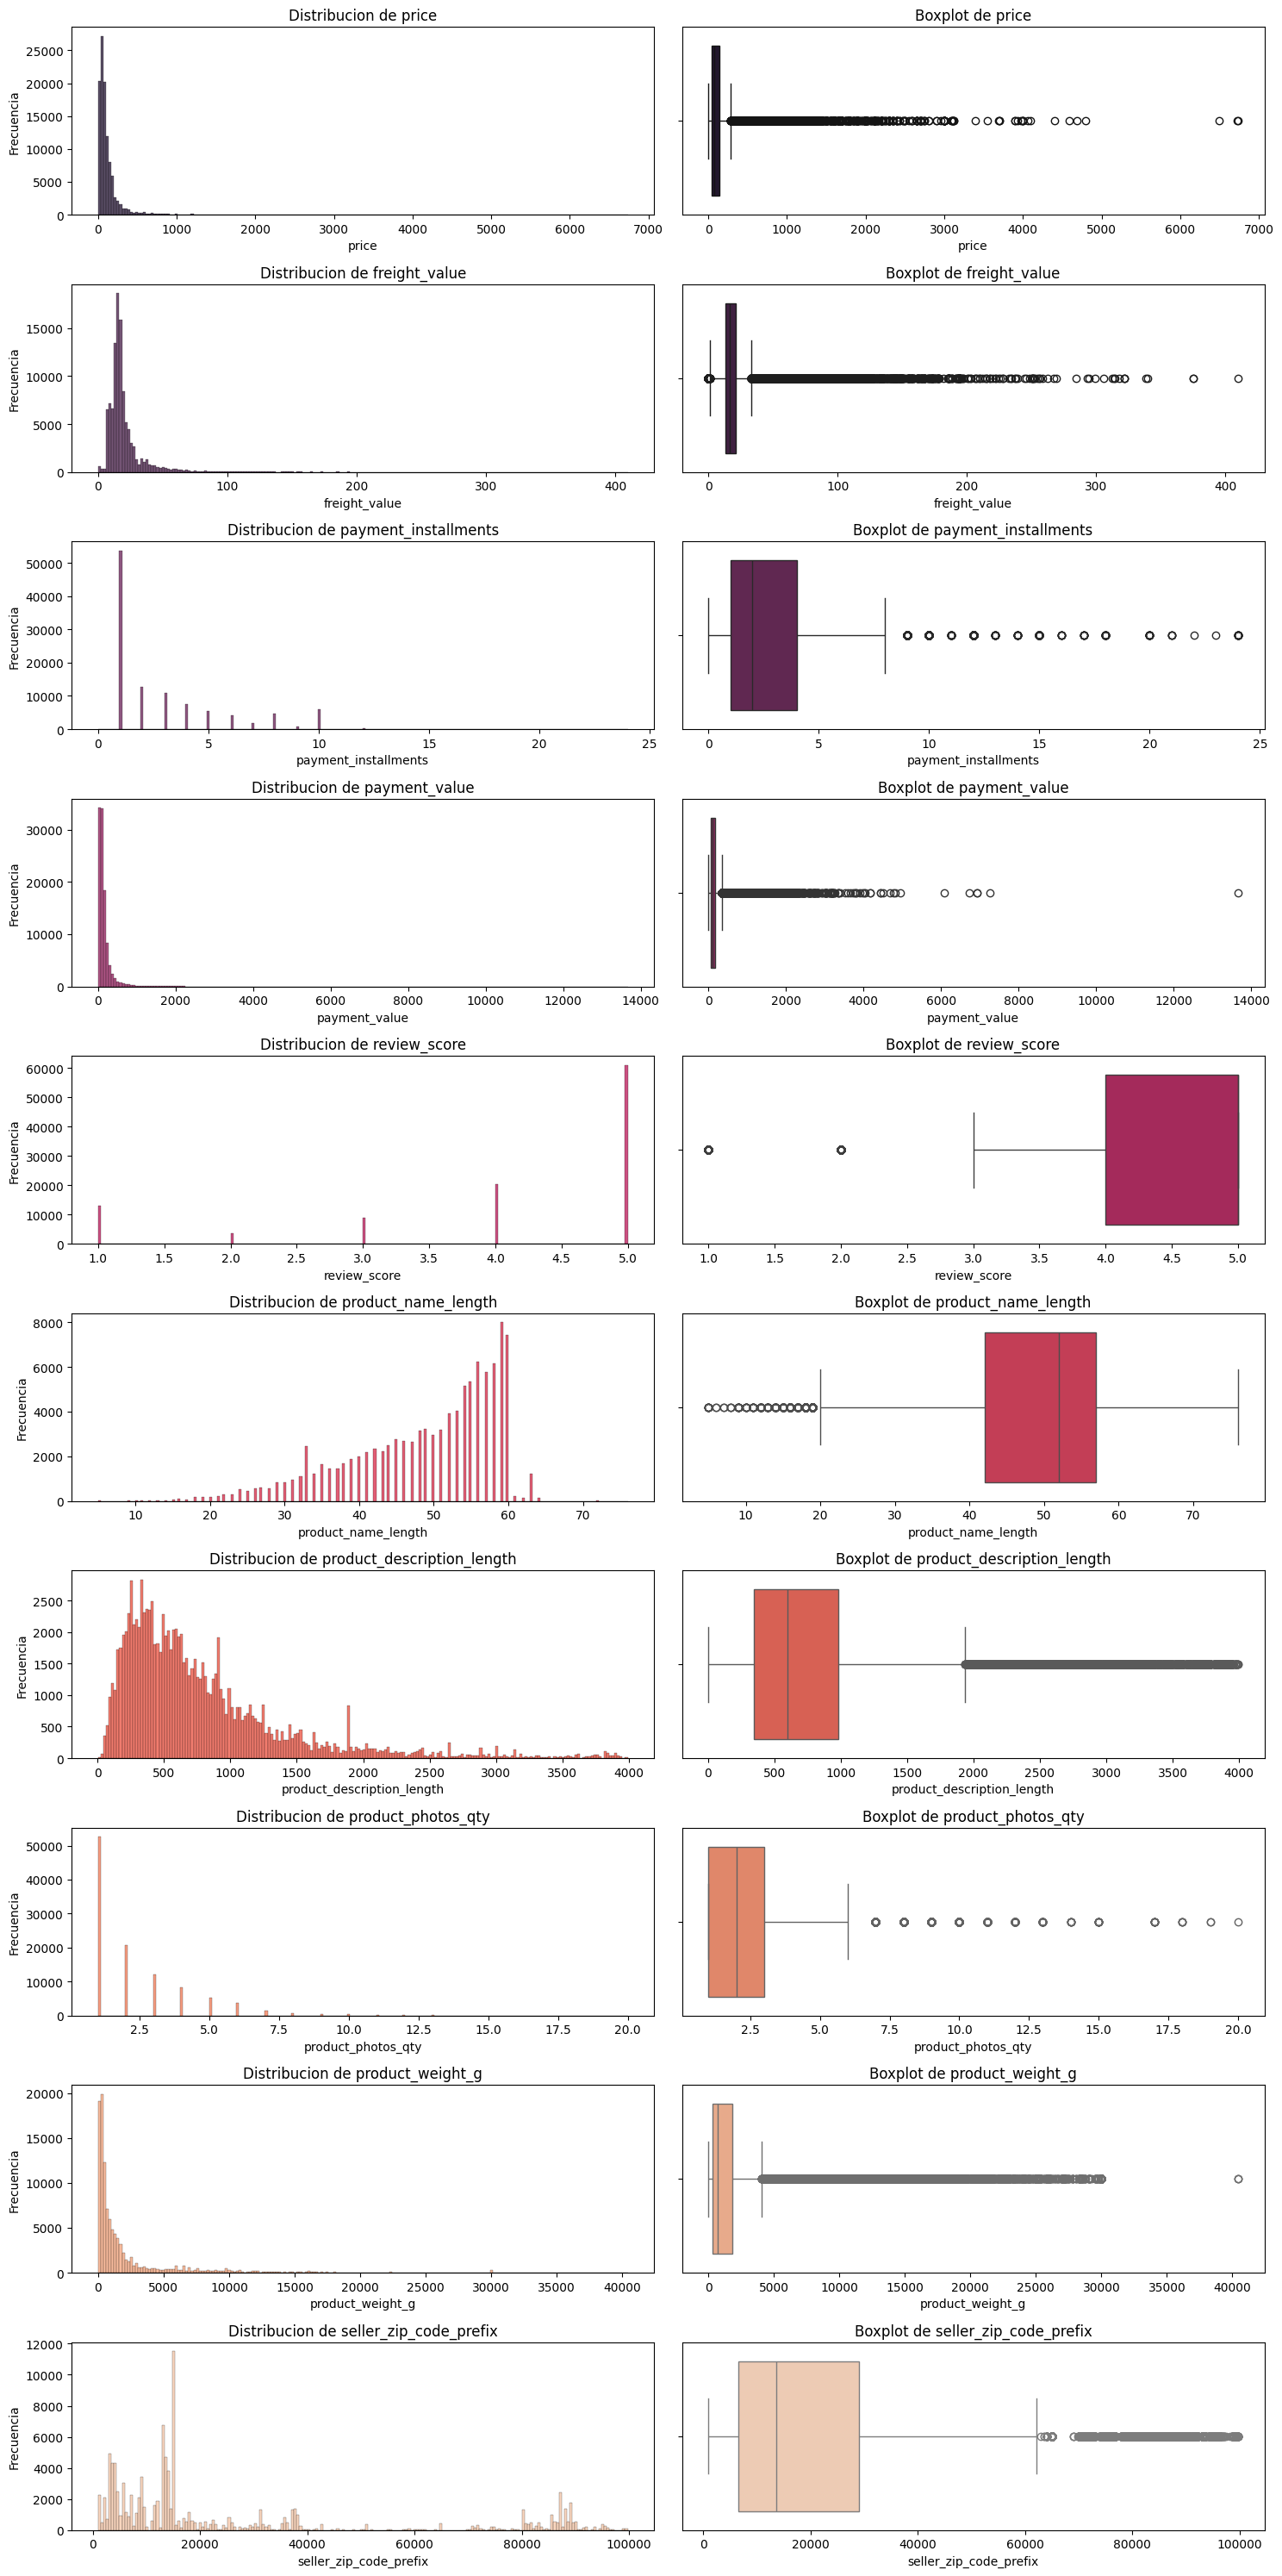

In [11]:
sv.subplot_col_num(df_nulos)

### Cálculo de Outliers

In [12]:
numericas = df_nulos.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numericas)

['price', 'freight_value', 'payment_installments', 'payment_value', 'review_score', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix']


In [13]:
sn.calculo_outliers(df_nulos,['price', 'freight_value', 'payment_installments', 'payment_value', 'review_score', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix'])

En la columna PRICE tenenemos un total de 8037 outliers, lo que representa un 7.452707715133531% del total
En la columna FREIGHT_VALUE tenenemos un total de 11636 outliers, lo que representa un 10.790059347181009% del total
En la columna PAYMENT_INSTALLMENTS tenenemos un total de 6936 outliers, lo que representa un 6.431750741839763% del total
En la columna PAYMENT_VALUE tenenemos un total de 8316 outliers, lo que representa un 7.7114243323442135% del total
En la columna REVIEW_SCORE tenenemos un total de 16587 outliers, lo que representa un 15.381120178041543% del total
En la columna PRODUCT_NAME_LENGTH tenenemos un total de 714 outliers, lo que representa un 0.6620919881305638% del total
En la columna PRODUCT_DESCRIPTION_LENGTH tenenemos un total de 6596 outliers, lo que representa un 6.1164688427299705% del total
En la columna PRODUCT_PHOTOS_QTY tenenemos un total de 3055 outliers, lo que representa un 2.8329005934718103% del total
En la columna PRODUCT_WEIGHT_G tenenemos un total d

* 'price' Outliers: 7.45% (8,037 outliers). Productos caros hasta 6,735. Outliers lógicos

* 'freight_value' Outliers: 10.79% (11,636 outliers). Envíos caros hasta 409 Outiers extremos, productos pesados/grandes

* 'payment_instalments' Outliers: 6.43% (6,936 outliers). Hasta 24 cuotas. Outliers lógicos

* 'payment_value' Outliers: 7.71% (8,316 outliers). Hasta 13,664

* 'review_score' Outliers: 15.38% (16,587 outliers). puntuaciones bajas (1-2) son minoría. Outliers valiosos

* 'product_name_lenght' Outliers: 0.66% (714 outliers). Nombres muy cortos <10 o largos >70.

* 'product_description_lenght' Outliers: 6.12% (6,596 outliers). Descripciones muy largas >3000 o cortas <50.Outliers lógicos

* 'product_photos_qty' Outliers: 2.83% (3,055 outliers). Productos con >10 fotos. Outliers lógicos (productos que necesitan muchas fotos)

* 'product_weight_g' Outliers: 14.04% (15,137 outliers). Productos muy pesados >10kg, máx 40kg.

* 'seller_zip_code_prefix' Outliers: 15.33% (16,530 outliers).Códigos postales inusuales son outliers estadísticos.


In [14]:
df_nulos.select_dtypes(include='number').isnull().mean()*100

price                         0.754822
freight_value                 0.754822
payment_installments          0.000927
payment_value                 0.000927
review_score                  0.785423
product_name_length           2.178227
product_description_length    2.178227
product_photos_qty            2.178227
product_weight_g              0.770586
seller_zip_code_prefix        0.754822
dtype: float64

* Dado que todas las columnas numéricas que tienen nulos, los tienen por debajo del umbral del 5% y además presentan outliers gestionaremos los nulos usando estadísticos avanzados. 

## Estadísticos avanzados

In [15]:
df_filled = sn.imputar_knn(df,['price', 'freight_value', 'payment_installments', 'payment_value', 'review_score', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix'])

In [16]:
df_filled = sn.imputar_iterative(df,['price', 'freight_value', 'payment_installments', 'payment_value', 'review_score', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix'])

,count,mean,std,min,25%,50%,75%,max
price_iterative,107837.0,124.463298,190.130778,-13.887343,40.00,78.00,139.00,6735.000000
freight_value_iterative,107837.0,20.148674,15.865676,0.000000,13.21,16.39,21.23,409.680000
payment_installments_iterative,107837.0,2.908006,2.731115,0.000000,1.00,2.00,4.00,24.000000
payment_value_iterative,107837.0,158.232498,219.990087,0.000000,58.24,102.83,176.75,13664.080000
review_score_iterative,107837.0,4.056269,1.364912,1.000000,4.00,5.00,5.00,6.047559
product_name_length_iterative,107837.0,48.874971,9.891009,5.000000,43.00,51.00,57.00,76.000000
product_description_length_iterative,107837.0,785.159512,644.048067,4.000000,349.00,613.00,973.00,3992.000000
product_photos_qty_iterative,107837.0,2.235106,1.720365,1.000000,1.00,2.00,3.00,20.000000
product_weight_g_iterative,107837.0,2104.524027,3763.513165,0.000000,300.00,700.00,1813.00,40425.000000
seller_zip_code_prefix_iterative,107837.0,24558.703976,27516.951767,1001.000000,6703.00,13843.00,28615.00,99730.000000


In [17]:
df_filled[['price','price_iterative', 'price_knn','freight_value','freight_value_iterative','freight_value_knn', 'payment_installments', 'payment_installments_iterative', 'payment_installments_knn','payment_value','payment_value_iterative','payment_value_knn','review_score','review_score_iterative','review_score_knn','product_name_length','product_name_length_iterative','product_name_length_knn','product_description_length','product_description_length_iterative','product_description_length_knn','product_photos_qty','product_photos_qty_iterative','product_photos_qty_knn','product_weight_g','product_weight_g_iterative','product_weight_g_knn','seller_zip_code_prefix','seller_zip_code_prefix_iterative','seller_zip_code_prefix_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,107026.0,124.317767,189.418364,0.850000,40.0000,78.000,139.00,6735.000000
price_iterative,107837.0,124.463298,190.130778,-13.887343,40.0000,78.000,139.00,6735.000000
price_knn,107837.0,124.381263,189.628016,0.850000,40.0000,78.000,139.00,6735.000000
freight_value,107026.0,20.137818,15.896242,0.000000,13.1500,16.340,21.23,409.680000
freight_value_iterative,107837.0,20.148674,15.865676,0.000000,13.2100,16.390,21.23,409.680000
freight_value_knn,107837.0,20.129446,15.869379,0.000000,13.1400,16.330,21.23,409.680000
payment_installments,107836.0,2.908008,2.731127,0.000000,1.0000,2.000,4.00,24.000000
payment_installments_iterative,107837.0,2.908006,2.731115,0.000000,1.0000,2.000,4.00,24.000000
payment_installments_knn,107837.0,2.907994,2.731119,0.000000,1.0000,2.000,4.00,24.000000
payment_value,107836.0,158.233155,219.991002,0.000000,58.2375,102.835,176.75,13664.080000


In [18]:
df_filled.drop(columns=['price','price_iterative','freight_value','freight_value_iterative', 'payment_installments', 'payment_installments_knn','payment_value','payment_value_iterative','review_score','review_score_knn','product_name_length','product_name_length_iterative','product_description_length','product_description_length_iterative','product_photos_qty','product_photos_qty_knn','product_weight_g','product_weight_g_iterative','seller_zip_code_prefix','seller_zip_code_prefix_knn'], inplace=True)

* product_id (0.75%) y seller_id (0.75%) presentando nulos no hay manera de saber qué se vendió ni quién lo vendió, asi que se pueden eliminar para preservar la integridad de los datos

In [19]:
df_filled=df_filled.dropna(subset=['product_id', 'seller_id'])

### Ajustes tras imputación de nulos

* review_score_iterative

Algún valor ha dejado de ser entero con la imputación de nulos así que se procede al ajuste

In [20]:
# Redondear a valores enteros
df_filled['review_score_iterative'] = df_filled['review_score_iterative'].round().astype(int)

# Limitar al rango 1-5
df_filled['review_score_iterative'] = df_filled['review_score_iterative'].clip(lower=1, upper=5)

C:\Users\victo\AppData\Local\Temp\ipykernel_29660\2964440924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['review_score_iterative'] = df_filled['review_score_iterative'].round().astype(int)
C:\Users\victo\AppData\Local\Temp\ipykernel_29660\2964440924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['review_score_iterative'] = df_filled['review_score_iterative'].clip(lower=1, upper=5)


* payment_installments_iterative

Imputación iterativa predijo un valor continuo (2.58997652382632). Así que procedemos al ajuste

In [21]:
# Redondear a enteros
df_filled['payment_installments_iterative'] = df_filled['payment_installments_iterative'].round().astype(int)

# Asegurar que sean valores válidos (mínimo 0, máximo razonable 24)
df_filled['payment_installments_iterative'] = df_filled['payment_installments_iterative'].clip(lower=0, upper=24)

C:\Users\victo\AppData\Local\Temp\ipykernel_29660\1606676428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['payment_installments_iterative'] = df_filled['payment_installments_iterative'].round().astype(int)
C:\Users\victo\AppData\Local\Temp\ipykernel_29660\1606676428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['payment_installments_iterative'] = df_filled['payment_installments_iterative'].clip(lower=0, upper=24)


In [22]:
df_filled.isnull().mean()*100

order_status                        0.000000
order_purchase_timestamp            0.000000
order_approved_at                   0.013081
order_delivered_carrier_date        1.008166
order_delivered_customer_date       2.194794
order_estimated_delivery_date       0.000000
payment_type                        0.000000
review_creation_date                1.186628
customer_zip_code_prefix            0.000000
customer_state                      0.000000
seller_state                        0.000000
product_category_name_english       0.000000
order_id                            0.000000
customer_id                         0.000000
product_id                          0.000000
seller_id                           0.000000
review_id                           0.773644
price_knn                           0.000000
freight_value_knn                   0.000000
payment_value_knn                   0.000000
product_name_length_knn             0.000000
product_description_length_knn      0.000000
product_we

##  Eliminación de reviews_id sin fecha

In [23]:
# Verificación de incoherencias entre  review_id y review_creation_date

print("Review_id nulo pero fecha NO nula:")
print(df[(df['review_id'].isnull()) & (df['review_creation_date'].notna())].shape[0])

print("\nReview_id NO nulo pero fecha nula:")
print(df[(df['review_id'].notna()) & (df['review_creation_date'].isnull())].shape[0])

print("\nAmbos nulos (coherente):")
print(df[(df['review_id'].isnull()) & (df['review_creation_date'].isnull())].shape[0])

Review_id nulo pero fecha NO nula:
0

Review_id NO nulo pero fecha nula:
451

Ambos nulos (coherente):
847


- Se eliminarán las filas de las 451 Reviews sin fecha y se dejarán los 847 que corresponden a los pedidos cuyos clientes no dejaron review. Por lo tanto tiene sentido el nulo, tanto de la review_id como de la review_creation_date

In [24]:

df_filled = df_filled[df_filled['review_id'].isnull() | df_filled['review_creation_date'].notna()]

In [25]:
df_filled.isnull().mean()*100

order_status                        0.000000
order_purchase_timestamp            0.000000
order_approved_at                   0.013135
order_delivered_carrier_date        1.007656
order_delivered_customer_date       2.196390
order_estimated_delivery_date       0.000000
payment_type                        0.000000
review_creation_date                0.776852
customer_zip_code_prefix            0.000000
customer_state                      0.000000
seller_state                        0.000000
product_category_name_english       0.000000
order_id                            0.000000
customer_id                         0.000000
product_id                          0.000000
seller_id                           0.000000
review_id                           0.776852
price_knn                           0.000000
freight_value_knn                   0.000000
payment_value_knn                   0.000000
product_name_length_knn             0.000000
product_description_length_knn      0.000000
product_we

## Gestión de nulos en fechas

* order_delivered_customer_date (2.20% nulos)

In [26]:
registros_sin_entrega = df_filled[df_filled['order_delivered_customer_date'].isna()]

print(f"Total sin fecha entrega: {len(registros_sin_entrega)}")
print(f"Porcentaje: {len(registros_sin_entrega)/len(df_filled)*100:.2f}%\n")

print("Distribución por order_status:")
print(registros_sin_entrega['order_status'].value_counts())
print(f"\nTotal: {registros_sin_entrega['order_status'].value_counts().sum()}")

Total sin fecha entrega: 2341
Porcentaje: 2.20%

Distribución por order_status:
order_status
shipped        1188
canceled        484
invoiced        335
processing      317
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64

Total: 2341


* El 99.7% de los 2341 son pedidos legítimamente "no entregados"

* Solo 8 registros (0.3%) son problemáticos: dicen "delivered" pero no tienen fecha de entrega.

* Se procederá a eliminar los 2341 registros ya que esto no tiene impacto significativo en el resto del análisis 


In [27]:
# eliminación de 2341 registros 
df_filled = df_filled[df_filled['order_delivered_customer_date'].notna()].copy()

* El resto de los nulos de las fechas parecen ser nulos lógicos por tanto no se eliminarán:
- order_approved_at (0.01% nulos): Pedidos cancelados antes de aprobarse
- order_delivered_carrier_date (1.01% nulos): Pedidos cancelados antes de enviar al transporte

In [28]:


df_filled.to_csv('../datos/df_data_no_nulos.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')